# Módulo 5 Sprint

## Tema

**Aprendizaje de máquina supervisado**


*Objetivo del proyecto (Competencias del módulo)*


**Elaborar un modelo predictivo a partir de un set de datos utilizando técnicas de aprendizaje de máquina supervisado implementados en lenguaje Python para resolver un problema.**


# Descripción del ejercicio


## Contexto


Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.


La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

**1.- Enliste todas las librerías que utilizará**

*Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba*


**2.- Importación y revisión de los datos**  *Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (número de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 



In [3]:
pro_pol_2009 = pd.read_csv('2009_1perc.csv')
pro_pol_2010 = pd.read_csv('2010_1perc.csv')

df_procedimientos_policiales = pd.concat([pro_pol_2009, pro_pol_2010]).reset_index()
df_procedimientos_policiales = df_procedimientos_policiales.drop(columns=['index'])

variable_respuesta = 'arstmade'

df_procedimientos_policiales.head()


,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20


In [4]:
df_procedimientos_policiales = df_procedimientos_policiales.replace(' ', np.nan)


df_procedimientos_policiales.head()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,NaN,41,G,7,NaN,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,NaN,108,J,NaN,NaN,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,NaN,43,E,NaN,NaN,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,NaN,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,NaN,110,H,NaN,NaN,1024535,0209890,CM,1,20


In [5]:

dimensiones_df = df_procedimientos_policiales.shape   # (11825, 112)
info_df = df_procedimientos_policiales.info()  # dtypes: float64(7), int64(16), object(89)

categorical = [var for var in df_procedimientos_policiales.columns if df_procedimientos_policiales[var].dtype=='O']
integer_variable = [var for var in df_procedimientos_policiales.columns if df_procedimientos_policiales[var].dtype=='int64']
float_variable = [var for var in df_procedimientos_policiales.columns if df_procedimientos_policiales[var].dtype=='float64']

df_categorical = df_procedimientos_policiales[categorical]
df_integer_variable = df_procedimientos_policiales[integer_variable]
df_float_variable = df_procedimientos_policiales[float_variable]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(7), int64(16), object(89)
memory usage: 10.1+ MB


In [6]:
#df_categorical.head()

In [7]:
#df_integer_variable.head()

In [8]:
#df_float_variable.head()

In [9]:
df_int_nulos = df_integer_variable.isnull().sum()
df_flo_nulos = df_float_variable.isnull().sum()
df_cat_nulos = df_categorical.isnull().sum()


df_nulos = pd.concat([df_int_nulos, df_cat_nulos, df_flo_nulos])
df_nulos = df_nulos[(df_nulos != 0)]

columna = ['Cantidad']

df_nulos = pd.DataFrame(df_nulos, columns=columna)

df_nulos['Porcentaje'] = round((df_nulos / df_procedimientos_policiales.shape[0]) * 100, 2)

df_nulos = df_nulos.sort_values('Cantidad', ascending=False)

cantidad_registros_nulos = df_nulos['Cantidad'].sum()   # 156956

df_nulos

,Cantidad,Porcentaje
zip,11825,100.00
state,11825,100.00
aptnum,11825,100.00
premtype,11825,100.00
rescode,11825,100.00
othfeatr,11825,100.00
officrid,11664,98.64
arstoffn,11078,93.68
sumoffen,11023,93.22
post,10651,90.07


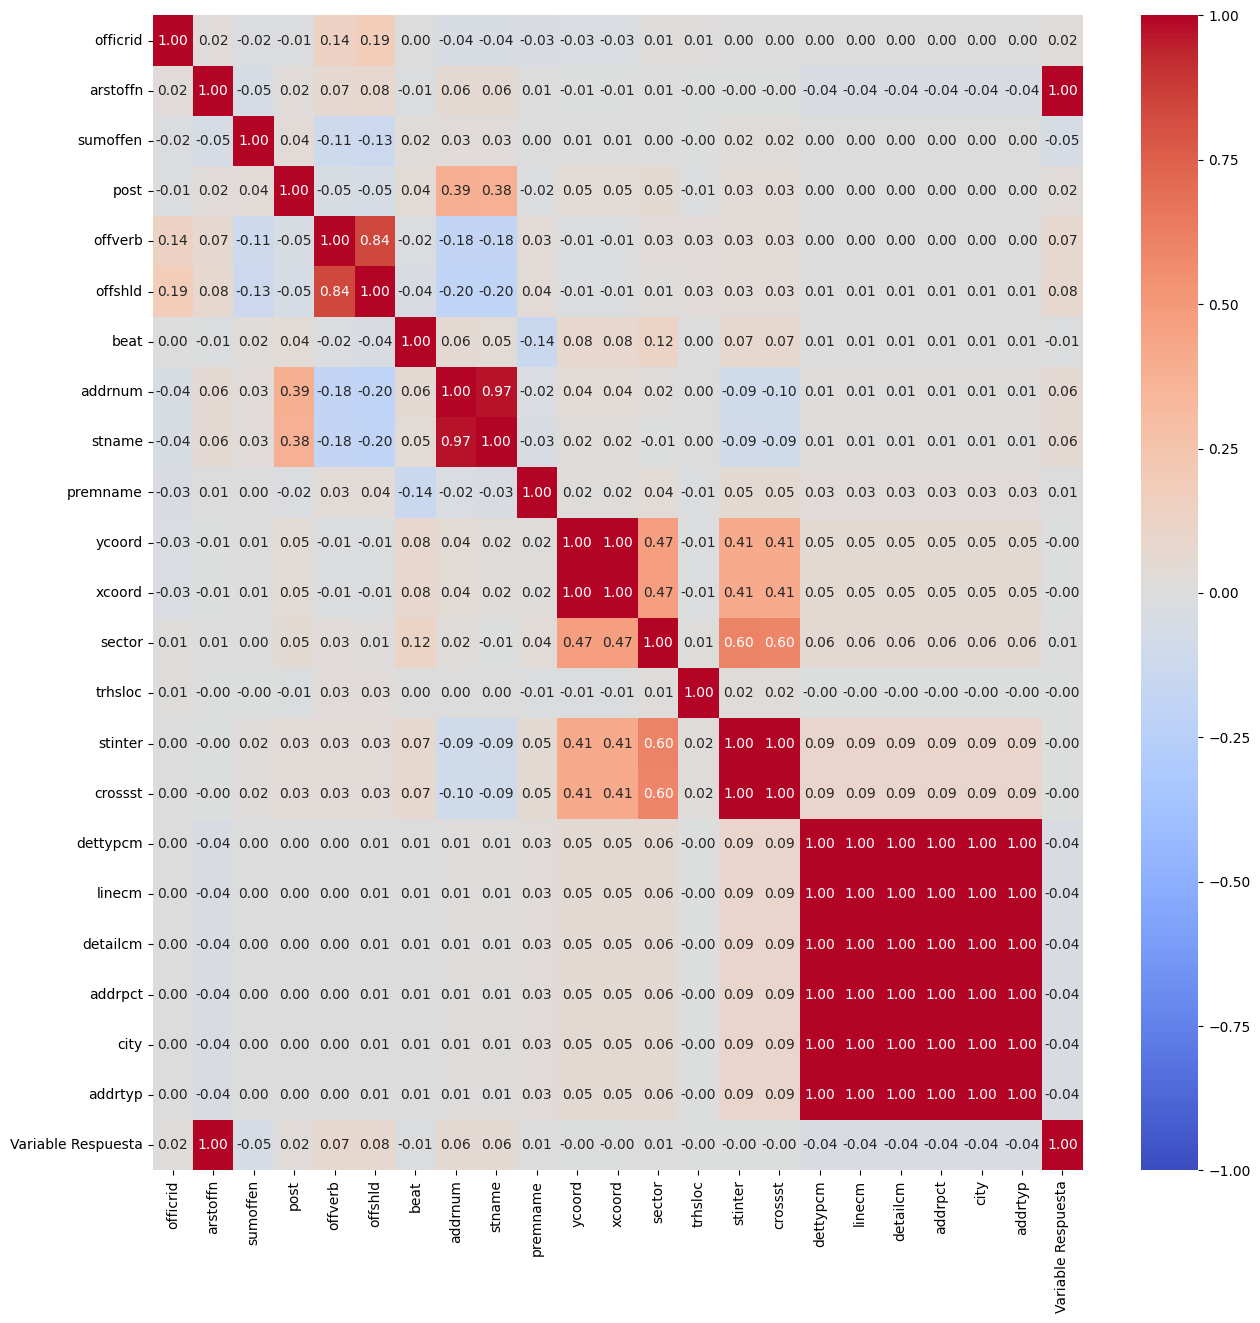

In [10]:
columnas_nulos = list(df_nulos.sort_values('Cantidad', ascending=False).index)

df_correlacion = pd.DataFrame(df_procedimientos_policiales[columnas_nulos].notnull().astype(int))
df_1 = pd.DataFrame(df_procedimientos_policiales[variable_respuesta].replace('N', 0).replace('Y', 1))


df_correlacion['Variable Respuesta'] = df_1


df_correlacion = df_correlacion.drop(['zip', 'state', 'aptnum', 'premtype', 'rescode', 'othfeatr'], axis=1)

matriz_correlacion = df_correlacion.corr()

figure = plt.figure(figsize=(15, 15))

sns.heatmap(data=matriz_correlacion, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.show()


In [11]:
len(df_procedimientos_policiales['city'].value_counts())

6

In [12]:
columnas_2_valores = []

for columna in df_procedimientos_policiales:
    if len(df_procedimientos_policiales[columna].value_counts())  == 2:
        columnas_2_valores.append(columna)



print("Columnas con dos valores: ",columnas_2_valores)
print(len(columnas_2_valores))


Columnas con dos valores:  ['year', 'recstat', 'inout', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'linecm']
60


In [13]:
df_2_valores = df_procedimientos_policiales[columnas_2_valores]
#df_2_valores

In [14]:
'''
# Esta celda tiene códifgo que no es necesariamente ejecutable ya que mediante la función genera gráficos para todas variables de la lista df_2_valores
# Si quiere activar la celda, eliminar las docstrings

def distribution_plots(df, columns=3):
    
    rows = np.ceil(df.shape[1] / columns).astype(int)
    height = rows * 3.5
    fig = plt.figure(figsize=(12, height))
 
    for n, i in enumerate(df.columns):
        
        if df[i].dtype in ('object', 'int64') :
            fig.add_subplot(rows, columns, n+1)
            ax = sns.countplot(x=i, data=df)
            plt.title(i)
            plt.xlabel('')
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2., height + .5,
                    '{:1.2f}'.format(height/len(df[i])), ha="center")

        if df[i].dtype == 'float64':
            fig.add_subplot(rows, columns, n+1)
            ax = sns.distplot(df[i])
            plt.title(i)
            plt.xlabel('')
            
    plt.tight_layout()

    return


distribution_plots(df_2_valores)'''

'\n# Esta celda tiene códifgo que no es necesariamente ejecutable ya que mediante la función genera gráficos para todas variables de la lista df_2_valores\n# Si quiere activar la celda, eliminar las docstrings\n\ndef distribution_plots(df, columns=3):\n    \n    rows = np.ceil(df.shape[1] / columns).astype(int)\n    height = rows * 3.5\n    fig = plt.figure(figsize=(12, height))\n \n    for n, i in enumerate(df.columns):\n        \n        if df[i].dtype in (\'object\', \'int64\') :\n            fig.add_subplot(rows, columns, n+1)\n            ax = sns.countplot(x=i, data=df)\n            plt.title(i)\n            plt.xlabel(\'\')\n            for p in ax.patches:\n                height = p.get_height()\n                ax.text(p.get_x()+p.get_width()/2., height + .5,\n                    \'{:1.2f}\'.format(height/len(df[i])), ha="center")\n\n        if df[i].dtype == \'float64\':\n            fig.add_subplot(rows, columns, n+1)\n            ax = sns.distplot(df[i])\n            plt.t

In [15]:
print(df_procedimientos_policiales['arstmade'].describe())

print('=' * 50)

print(df_procedimientos_policiales['arstmade'].value_counts())

print('=' * 50)

print(f'La cantidad total de registros nulos en el data frame es: {cantidad_registros_nulos}')
print(f'Corresponde al {(cantidad_registros_nulos/df_procedimientos_policiales.size * 100):.2f} % del total de registros del DataFrame')
print('\n' + f'La cantidad de filas en el DataFrame es {df_procedimientos_policiales.shape[0]}')
print(f'La cantidad de columnas en el DataFrame es {df_procedimientos_policiales.shape[1]}')
print('\n' + f'Variables Integer: {df_integer_variable.shape[1]}')
print(f'Variables Float: {df_float_variable.shape[1]}')
print(f'Variables Categóricas: {df_categorical.shape[1]}')
print(f'La cantidad de variables que incluyen registros nulos es {df_nulos.shape[0]}')



count     11825
unique        2
top           N
freq      11077
Name: arstmade, dtype: object
arstmade
N    11077
Y      748
Name: count, dtype: int64
La cantidad total de registros nulos en el data frame es: 156956
Corresponde al 11.85 % del total de registros del DataFrame

La cantidad de filas en el DataFrame es 11825
La cantidad de columnas en el DataFrame es 112

Variables Integer: 16
Variables Float: 7
Variables Categóricas: 89
La cantidad de variables que incluyen registros nulos es 28


Se importan los datos en dos variables y se concatenan en *'df_procedimientos_policiales'*, DataFrame del cual se realizará el estudio.  Las dimensiones de este DataFrame es 11825 filas por 112 columnas.  En primera visualización se obtiene vista de registros vacíos pero que no son considerados por Python como nulos ya que son registros que contienen ' ' (espacio) caracter lo que es distinto a vacío o nulo.  Se reemplazan los valores (espacio) por el valor np.nan.  Se exploran el tipo de dato de las variables obteniendo: 89 variables categóricas (se restan 6 variables categóricas al df original cuando se realiza el paso de replace); 16 variables Integer y 7 variables Float.  Decido observar en detalle la calidad de los datos *por cada tipo de dato* y me parece útil crear DataFrames *por cada tipo de dato* y explorarlos en profundidad.  Algunas observaciones:

- 6 de las 7 variables float no contiene datos en su totalidad (todos Nan), por consiguiente estas variables no tienen ninguna influencia en la variable target y se sugiere eliminar del modelo pues no aporta poder predictivo.  Estas variables son las mismas que se reclasificaron como float luego de la accion .replace().

- Al reemplazar los registros con caracter (espacio) ' ', se pudo descubrir los valores perdidos que en total del DataFrame asciende a 156.956 registros y corresponde al 11,85% del total de registros del DataFrame

- Se observa que en las variables integer existen datos que no aportan valor estadístico como 'Unnamed:0' y 'dob'.  Se sugiere eliminarlas del modelo.  Se aprecia tambien que existen variables del tipo DatTime como 'year', 'datestop', 'timestop'.

- Se quiere observar el comportamiento de las variables que tienen valores binarios para descubrir desbalances que no aporten valor al modelo.  Se obtiene que de las 112 columnas, 60 contienen datos binarios.  Se incluye función que permite graficar los datos comparativos de estas 60 variables.  Con este resultado podemos observar que el 6% de los procedimientos concluyen en arresto según muestra su gráfico.  También se cuentan 11 de las 60 variables que tienen un desbalancel del 100% por este motivo también se concluye que no tiene valor para el modelo y deben se eliminadas.

- En estudio de índices de correlación entre la variables respuesta y las 28 variables que contienen registros nulos se obtiene que, con excepción de la variable 'arstoffn', ninguna de las otras 27 variables tiene un indice de correlación significante respecto a la variable respuesta.  Si bien un índice de correlación no siempre suele explicar la verdadera naturaleza de su valor, en este caso, yo apunto a que no tienen valor relevante para el modelo y se deberían eliminar.  Se incluye mapa de calor de matriz de correlación.

- Podrían existir observaciones más finas sobre la calidad de los datos, como los valores únicos, cambios de datatype u otros pero todo trabajo más fino se debiese aplicar posterior a la eliminación de columnas que no aportan valor al modelo.

## 3.- Preprocesamiento de datos 

Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

● 3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categóricas)

In [16]:
columnas_2_a_99_valores = []

for columna in df_procedimientos_policiales:
    if len(df_procedimientos_policiales[columna].value_counts())  >= 2 | len(df_procedimientos_policiales[columna].value_counts() <= 99):
        if df_procedimientos_policiales[columna].dtype=='O':
            columnas_2_a_99_valores.append(columna)



print("Columnas con valores entre 2 y 99 ambos inclusive: ",columnas_2_a_99_valores)
print(f'El total de variables que tienen entre 2 y 99 categorias de registros es {len(columnas_2_a_99_valores)}')

Columnas con valores entre 2 y 99 ambos inclusive:  ['recstat', 'inout', 'trhsloc', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'sumoffen', 'offunif', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'sex', 'haircolr', 'eyecolor', 'addrnum', 'city', 'sector', 'beat', 'xcoord', 'ycoord', 'linecm']
El total de variables que tienen entre 2 y 99 categorias de registros es 70


● 3.2 Reemplace las siguientes clases faltantes:

- Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'

In [17]:

df_procedimientos_policiales['officrid'] = np.where(df_procedimientos_policiales['officrid'].isna(), 'N', 'Y')
df_procedimientos_policiales['offshld'] = np.where(df_procedimientos_policiales['offshld'].isna(), 'N', 'Y')
df_procedimientos_policiales['offverb'] = np.where(df_procedimientos_policiales['offverb'].isna(), 'N', 'Y')



*- Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de cómo haya categorizado la base de datos), cámbielo a 'U' y en caso contrario mantenga su valor*

In [18]:

df_procedimientos_policiales['sector'] = np.where(df_procedimientos_policiales['sector'].isna(), 'U', df_procedimientos_policiales['sector'])
df_procedimientos_policiales['trhsloc'] = np.where(df_procedimientos_policiales['trhsloc'].isna(), 'U', df_procedimientos_policiales['trhsloc'])
df_procedimientos_policiales['beat'] = np.where(df_procedimientos_policiales['beat'].isna(), 'U', df_procedimientos_policiales['beat'])





*Nota, los valores significan {N: No, Y: Yes, U: Unknown}*


*● 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)*

In [19]:
pies_a_metros = 0.3048
pulgadas_a_metros = 0.0254

df_procedimientos_policiales['ht_feet'] = df_procedimientos_policiales['ht_feet'] * pies_a_metros
df_procedimientos_policiales['ht_inch'] = df_procedimientos_policiales['ht_inch'] * pulgadas_a_metros
df_procedimientos_policiales['metros'] = df_procedimientos_policiales['ht_feet'] + df_procedimientos_policiales['ht_inch']

df_procedimientos_policiales = df_procedimientos_policiales.drop(columns=['ht_feet', 'ht_inch'], axis=1)



*● 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.*

In [20]:
df_procedimientos_policiales['year'] = pd.to_datetime(df_procedimientos_policiales['datestop'], format='%m%d%Y').dt.year
df_procedimientos_policiales['month'] = pd.to_datetime(df_procedimientos_policiales['datestop'], format='%m%d%Y').dt.month


#df_procedimientos_policiales['year'].head()


In [21]:
#df_procedimientos_policiales['month'].head()

*● 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades estén entre 18 y 100 años, ambos inclusive.*

In [22]:
columnas_seleccionadas = columnas_2_a_99_valores + ['month', 'year', 'metros', 'age', 'race']

df_filtrado = df_procedimientos_policiales[columnas_seleccionadas] 
df_filtrado = df_filtrado[(df_filtrado['age'] >= 18) & (df_filtrado['age'] <= 100)]

#df_filtrado.head()

# 4.- Análisis exploratorio

● 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

● 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

● 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

● 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.




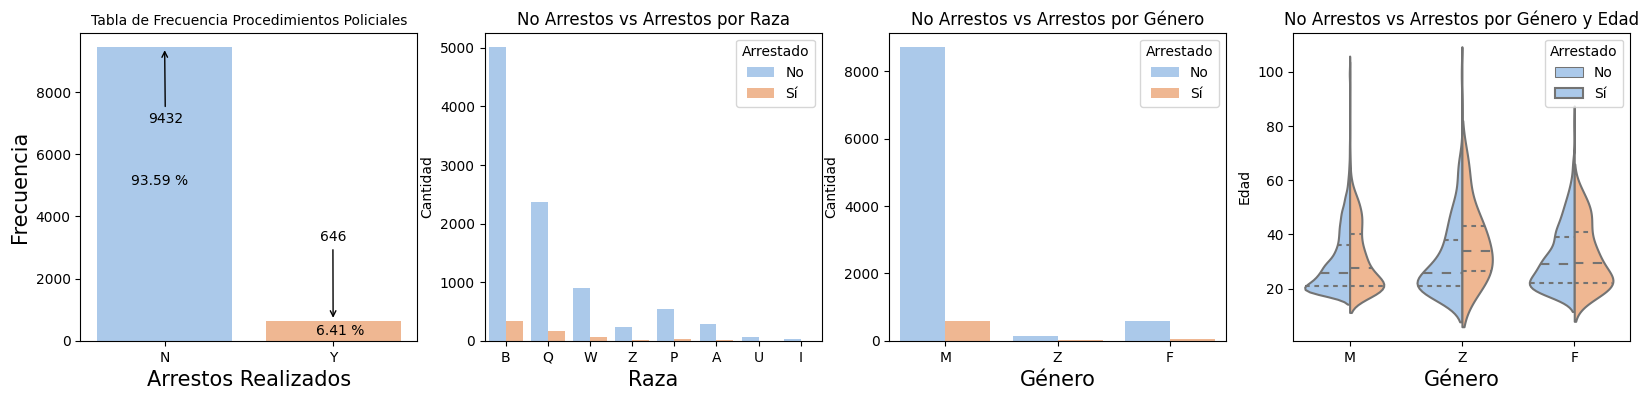

In [23]:
df_filtrado[variable_respuesta]
tabla_de_frecuencia = df_filtrado[variable_respuesta].value_counts()
cantidad_no_arresto = tabla_de_frecuencia[0]
cantidad_arresto = tabla_de_frecuencia[1]
porcentaje_no_arresto =  cantidad_no_arresto / len(df_filtrado) * 100
porcentaje_arresto = cantidad_arresto / len(df_filtrado) * 100

raza_arstmade = [variable_respuesta, 'race']
df_raza_arstmade = df_filtrado[raza_arstmade]
df_raza_arstmade['arstmade'] =  df_raza_arstmade['arstmade'].map({'N':0, 'Y':1})
tabla_de_frecuencia_raza = pd.crosstab(df_raza_arstmade['race'], df_raza_arstmade['arstmade'])

sexo_arstmade =  ['arstmade', 'sex']
df_sexo_arstmade = df_filtrado[sexo_arstmade]

edad_sexo = ['arstmade', 'age', 'sex']
df_edad_sexo =  df_filtrado[edad_sexo]

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

sns.barplot(ax=axes[0], x=tabla_de_frecuencia.index, y=tabla_de_frecuencia.values, palette='pastel')
axes[0].set_title('Tabla de Frecuencia Procedimientos Policiales', fontsize=10)
axes[0].set_xlabel('Arrestos Realizados', fontsize=15)
axes[0].set_ylabel('Frecuencia', fontsize=15)
axes[0].annotate(cantidad_no_arresto, xy=(0, 9432), xytext=(-0.1, 7000), fontsize=10,
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
axes[0].annotate(f'{round(porcentaje_no_arresto, 2)} %', xy=(0.8, 5000), xytext=(-0.2, 5000), fontsize=10)
axes[0].annotate(cantidad_arresto, xy=(1, 646), xytext=(0.92, 3200), fontsize=10,
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
axes[0].annotate(f'{round(porcentaje_arresto, 2)} %', xy=(0.9, 200), xytext=(0.9, 200), fontsize=10)

sns.countplot(ax=axes[1], data=df_raza_arstmade, x='race', hue='arstmade', palette='pastel')
axes[1].set_title('No Arrestos vs Arrestos por Raza')
axes[1].set_xlabel('Raza', fontsize=15)
axes[1].set_ylabel('Cantidad', fontsize=10)
axes[1].legend(title='Arrestado', labels=['No', 'Sí'])


sns.countplot(ax=axes[2], data=df_sexo_arstmade, x='sex', hue='arstmade', palette='pastel')
axes[2].set_title('No Arrestos vs Arrestos por Género')
axes[2].set_xlabel('Género', fontsize=15)
axes[2].set_ylabel('Cantidad', fontsize=10)
axes[2].legend(title='Arrestado', labels=['No', 'Sí'])
#sns.barplot(ax=axes[1], data=df_raza_arstmade, x='arstmade', y=df_raza_arstmade.values, palette='pastel')

#sns.scatterplot(ax=axes[3], data=df_edad_sexo, x='sex', y='age', hue='arstmade', palette='dark', alpha=0.4)
sns.violinplot(ax=axes[3], data=df_edad_sexo, x='sex', y='age', split=True, hue='arstmade', palette='pastel', inner='quartile')
axes[3].set_title('No Arrestos vs Arrestos por Género y Edad')
axes[3].set_xlabel('Género', fontsize=15)
axes[3].set_ylabel('Edad', fontsize=10)
axes[3].legend(title='Arrestado', labels=['No', 'Sí'])


plt.show()



Según observación de los gráficos generados para las indicaciones del ejercicio puedo comentar los siguiente:

1. De un total de 10.078 controles policiales registrados válidos luego del filtro de edad, se obtiene que solo 646 de ellos concluye en arresto lo que equivale al 6,41 % de los controles realizados.  La cantidad de controles que no terminan en arresto equivale a 9.432 registros.  Solo en base a los datos de este gráfico no es posible obtener mayores certezas respecto al comportamiento.

2. En el segundo gráfico se puede observar una tendencia, o sesgo, respecto a la distribución de los controles si los segregamos por raza.  Se aprecia claramente que las personas categorizadas con raza B son las que concentran la mayor cantidad de registros realizados, esto constituye un claro sesgo discrimandor racial.  Se puede ver también que existe sesgo con al menos otros dos grupos étnicos más y los demás grupos se comportan en distribuciones más parecidas a la normal.  Se concluye que bajo pertenencia a ciertas etnias es más probable que seas controlado sin embargo no hay evidencias que puedan concluir que debido a tu etnia puedas ser arrestado.

3. Se observa tendencia a mayores controles realizados a sujetos de género másculino, en cantidad también son la categoría que concentra mayor cantidad de detenidos.  Al igual que la variable raza, no existe evidencia suficiente para asegurar que el género es constitutivo de terminar bajo arresto si eres sometido a un control policial.  Si se puede concluir la probabilidad de ser controlado respecto a tu género.

4. La diferencia de magnitud entre los controles realizados por género me orienta a graficar en este caso, mediante un gráfico de violín para poder observar el comportamiento de los datos bajos las variables 'edad y sexo' en conjunto.  El gráfico de violín nos permite observar comportamientos de distribución de sus datos y por lo tanto probabilidad de distribución.  De todas maneras el análisis realizado me permite concluir que, con excepcion de arrestos realizados genero Z, todas las otras variables contienen sus picos de densidad en un rango cercano de diferencia, también comparten rangos cercanos de diferencia los valores de sus cuartiles e incluso la forma de su curva de distribución que concentra la mayor densidad alrededor de los 20 años inclinando la curva hacia la izquierda del eje, en cambio el 'género Z arrestado' muestra una distribución más similar a la normal, su moda parece estar bien alineada con su media y la curva es más ancha pero sus métricas no comparten el mismo comportamiento de las métricas de las demás categorías.

● 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

● 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado, condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?

In [24]:
df_filtrado['arstmade'] =  df_filtrado['arstmade'].map({'N':0, 'Y':1})

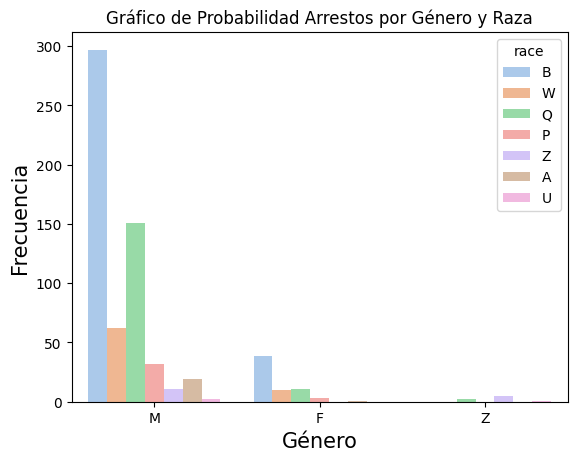

In [25]:

probabilidad_arresto = ['arstmade', 'race', 'sex']
df_probabilidad_arresto = df_filtrado[probabilidad_arresto]
df_probabilidad_arresto = df_probabilidad_arresto[df_probabilidad_arresto['arstmade'] == 1]

sns.countplot(data=df_probabilidad_arresto, x='sex', hue='race', palette='pastel')

plt.title('Gráfico de Probabilidad Arrestos por Género y Raza')
plt.xlabel('Género', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

plt.show()

Claramente la raza B es la que tiene mayor ocurrencia.  Como hemos observado previamente, esto deriva de un sesgo en la realización de controles policiales siendo la raza B la más susceptible a prejuicio, esto deriva en que es por lejos más controlada.  El solo hecho de ser el de un grupo étnico prejuiciado incide en la cantidad de casos que terminan en arrestos.  Otras dos razas más conforman junto con raza B, la mayor cantidad de casos por lo que podemos concluir que la tasa de arrestos está condicionada por el grupo étnico al cual pertences pues estás más expuesto a ser controlado.

## 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.


Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['*pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'.Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

2437


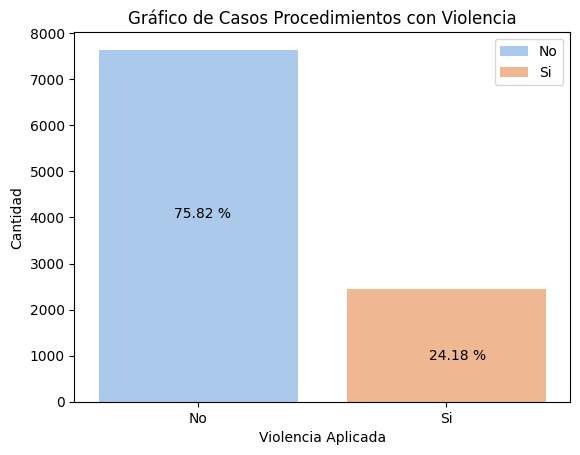

In [26]:
lista_violencia = ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']

df_lista_violencia = df_filtrado[lista_violencia]
df_lista_violencia['violencia'] = df_lista_violencia.apply(lambda row: row.str.contains('Y').any(), axis=1)

df_lista_violencia['violencia'] = df_lista_violencia['violencia'].astype(int)
conteo_porcentaje_violencia = df_lista_violencia['violencia'].value_counts()

porcentaje_no_violento = conteo_porcentaje_violencia[0] / df_filtrado.shape[0] * 100
porcentaje_violento =  conteo_porcentaje_violencia[1] / df_filtrado.shape[0] * 100

print(conteo_porcentaje_violencia[1])

sns.barplot(x=conteo_porcentaje_violencia.index, y=conteo_porcentaje_violencia.values, palette='pastel', label={'No':0, 'Si':1})

plt.title('Gráfico de Casos Procedimientos con Violencia')
plt.xlabel('Violencia Aplicada')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Si'])
plt.annotate(f'{porcentaje_no_violento:.2f} %', xy=(0, 7641), xytext=(-0.1, 4000), fontsize=10)
plt.annotate(f'{porcentaje_violento:.2f} %', xy=(1, 2437), xytext=(0.93, 900), fontsize=10)

plt.legend()
plt.show()


In [27]:
df_violencia = df_lista_violencia['violencia']

df_filtrado['violencia'] = df_violencia
#df_filtrado

In [28]:
df_filtrado['city'] = df_filtrado['city'].replace('STATEN IS', 'STATEN ISLAND')
df_filtrado = df_filtrado.drop(columns=['xcoord', 'ycoord'])

for var in lista_violencia:

    df_filtrado = df_filtrado.drop(columns=[var])


#df_filtrado.head()

Se eliminan del dataframe las columnas que fueron utilizadas para crear la variable violencia pues ahora tienen un indicador que las representa con mejor respecto los parámetros del estudio (variable 'violencia').

In [29]:
filtrado_2_valores = []

for columna in df_filtrado:
    if len(df_filtrado[columna].value_counts())  > 2:
            filtrado_2_valores.append(columna)

#filtrado_2_valores

In [30]:
#len(filtrado_2_valores)

In [31]:
print(' CATEGORÍAS POR VARIABLE '.center(35, '='))

for var in filtrado_2_valores:
    print(f'{var} '.ljust(20, '.') + f' {len(df_filtrado[var].value_counts())}'.rjust(15,'.'))



===== CATEGORÍAS POR VARIABLE =====
trhsloc ......................... 4
sumoffen ...................... 340
sex ............................. 3
haircolr ....................... 11
eyecolor ....................... 11
addrnum ...................... 2065
city ............................ 5
sector ......................... 18
beat ........................... 64
month .......................... 12
metros ......................... 33
age ............................ 61
race ............................ 8


In [32]:
nan_en_addrnum = df_filtrado['addrnum'].isna().sum()
nan_en_sumoffen = df_filtrado['sumoffen'].isna().sum()

valores_en_sumoffen = df_filtrado['sumoffen'].value_counts()

df_filtrado['beat'] = df_filtrado['beat'].str.strip()
valores_en_beat = df_filtrado['beat'].value_counts()


In [33]:
print(' CATEGORÍAS POR VARIABLE '.center(35, '='))

for var in filtrado_2_valores:
    print(f'{var} '.ljust(20, '.') + f' {len(df_filtrado[var].value_counts())}'.rjust(15,'.'))

===== CATEGORÍAS POR VARIABLE =====
trhsloc ......................... 4
sumoffen ...................... 340
sex ............................. 3
haircolr ....................... 11
eyecolor ....................... 11
addrnum ...................... 2065
city ............................ 5
sector ......................... 18
beat ........................... 35
month .......................... 12
metros ......................... 33
age ............................ 61
race ............................ 8


In [34]:
df_filtrado = df_filtrado.drop(columns=['addrnum', 'sumoffen'])

filtrado_2_valores.remove('addrnum')
filtrado_2_valores.remove('sumoffen')

#df_filtrado

De las 63 columnas que quedan luego del ajuste al dataframe, 52 corresponden a variables binarias y 11 son variables multicategoricas no binarias.

Se decide excluir del modelo las variables 'addrnum' que contenía 2065 valores distintos y 5850 valores nulos.  Los registros tampoco eran interpretables ni aportaban valor al modelo.  Se excluye también la variable 'summoffend' por motivos de la calidad de sus datos ya que tiene un total de 340 valores distintos, poco confiables y del total de registros tiene un total de 9.366 valores vacíos.

## 6.- Modelación 

● 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año 2009 para entrenar, y el año 2010 para testear. 

In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df_filtrado.apply(pd.unique))

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')



recstat                                                 [A, 1]
inout                                                   [O, I]
trhsloc                                           [P, T, H, U]
explnstp                                                [Y, N]
othpers                                                 [N, Y]
arstmade                                                [0, 1]
sumissue                                                [N, Y]
offunif                                                 [Y, N]
frisked                                                 [N, Y]
searched                                                [N, Y]
contrabn                                                [N, Y]
pistol                                                  [N, Y]
riflshot                                                [N, Y]
asltweap                                                [N, Y]
knifcuti                                                [N, Y]
othrweap                                               

In [36]:
df_filtrado['recstat'] = df_filtrado['recstat'].replace('A', 0)
df_filtrado = df_filtrado.replace('N', 0)
df_filtrado = df_filtrado.replace('Y', 1)
df_filtrado['linecm'] = df_filtrado['linecm'].str.strip()
df_filtrado['linecm'] = df_filtrado['linecm'].replace(np.nan, 0)
df_filtrado['inout'] = df_filtrado['inout'].replace('O', 0)
df_filtrado['inout'] = df_filtrado['inout'].replace('I', 1)



In [37]:
dummies_lista = ['sex', 'haircolr', 'eyecolor', 'city', 'sector', 'beat', 'month', 'race', 'trhsloc']

df_filtrado = pd.get_dummies(df_filtrado, columns=dummies_lista)
df_filtrado = df_filtrado.replace(True, 1)
df_filtrado =  df_filtrado.replace(False,0)
#df_filtrado

In [38]:


preparacion_datos_entrenamiento = df_filtrado[df_filtrado['year'] == 2009]
preparacion_datos_testeo = df_filtrado[df_filtrado['year'] == 2010]

preparacion_datos_entrenamiento = preparacion_datos_entrenamiento.drop('year', axis=1)
preparacion_datos_testeo = preparacion_datos_testeo.drop('year', axis=1)

X_train = preparacion_datos_entrenamiento.drop('arstmade', axis=1)
X_test = preparacion_datos_testeo.drop('arstmade', axis=1)

y_train = preparacion_datos_entrenamiento['arstmade']
y_test = preparacion_datos_testeo['arstmade']




● 6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno).

### Estimador Arbol de Decisión

In [39]:
# Tarda aproximadamente 20 segundos en cargar

modelo_clasificador_arbol_decision = DecisionTreeClassifier(random_state=42)

parametros = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 9]}

grid_search = GridSearchCV(estimator=modelo_clasificador_arbol_decision, param_grid=parametros, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

resultados = pd.DataFrame(grid_search.cv_results_)
mejores_parametros = grid_search.best_params_

print(' MEJORES HIPERPARÁMETROS '.center(40, '=') + '\n')
print('CRITERIO '.ljust(25, '.') + f' {mejores_parametros["criterion"]}'.rjust(15, '.') + '\n\n' + 'PROFUNDIDAD '.ljust(25, '.') + f' {mejores_parametros["max_depth"]}'.rjust(15, '.'))
print('\n' + '=' * 40)


print('\n' + ' MSE por Combinación de Hiperparámetros  '.center(68, '=') + '\n')
print(resultados[['param_criterion', 'param_max_depth', 'mean_test_score', 'mean_train_score']])
print('\n' +  '=' * 68)

======= MEJORES HIPERPARÁMETROS ========

CRITERIO ....................... entropy

PROFUNDIDAD .......................... 3


============= MSE por Combinación de Hiperparámetros  ==============

  param_criterion param_max_depth  mean_test_score  mean_train_score
0            gini               1        -0.037095         -0.037096
1            gini               3        -0.032885         -0.030368
2            gini               5        -0.033888         -0.026580
3            gini               7        -0.034689         -0.022302
4            gini               9        -0.035492         -0.018671
5         entropy               1        -0.037095         -0.037096
6         entropy               3        -0.032685         -0.030568
7         entropy               5        -0.032685         -0.027516
8         entropy               7        -0.034489         -0.023706
9         entropy               9        -0.039302         -0.017913



In [40]:
modelo_clasificador_arbol_decision_2 = DecisionTreeClassifier(random_state=42, max_depth=3, criterion= 'entropy')
modelo_clasificador_arbol_decision_2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [41]:

y_pred = modelo_clasificador_arbol_decision_2.predict(X_test)
mse_modelo_clasificador_arbol_decision_2 = mean_squared_error(y_test, y_pred)

matriz_confusion = confusion_matrix(y_test, y_pred)
informe_clasificacion = classification_report(y_test, y_pred)

sumatoria_matriz_confusion =  np.sum(matriz_confusion)
matriz_confusion_porcentajes =  matriz_confusion / sumatoria_matriz_confusion * 100


### Estimador Random Forest

In [42]:
# Tarda aproximadamente 17 segundos en cargar


modelo_clasificacion_random_forest = RandomForestClassifier(random_state=42)
modelo_clasificacion_random_forest.fit(X_train, y_train)

parametros_gscvrf = {'n_estimators': [50, 100, 200], 'max_depth': [2, 10, 20]}

grid_searchrf = GridSearchCV(estimator=modelo_clasificacion_random_forest, param_grid=parametros_gscvrf, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_searchrf.fit(X_train, y_train)

resultados_rf = pd.DataFrame(grid_searchrf.cv_results_)
mejores_parametros_rf = grid_searchrf.best_params_

print(' MEJORES HIPERPARÁMETROS '.center(40, '=') + '\n')
print('N Estimadores '.ljust(25, '.') + f' {mejores_parametros_rf["n_estimators"]}'.rjust(15, '.') + '\n\n' + 'PROFUNDIDAD '.ljust(25, '.') + f' {mejores_parametros_rf["max_depth"]}'.rjust(15, '.'))
print('\n' + '=' * 40)


print('\n' + ' MSE por Combinación de Hiperparámetros  '.center(68, '=') + '\n')
print(resultados_rf[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'mean_train_score']])
print('\n' +  '=' * 68)

======= MEJORES HIPERPARÁMETROS ========

N Estimadores ...................... 100

PROFUNDIDAD ......................... 20


============= MSE por Combinación de Hiperparámetros  ==============

  param_n_estimators param_max_depth  mean_test_score  mean_train_score
0                 50               2        -0.060958         -0.060958
1                100               2        -0.060958         -0.060958
2                200               2        -0.060958         -0.060958
3                 50              10        -0.037296         -0.023661
4                100              10        -0.036293         -0.023461
5                200              10        -0.036694         -0.022558
6                 50              20        -0.037096         -0.002106
7                100              20        -0.035291         -0.001504
8                200              20        -0.035491         -0.001404



In [43]:
modelo_clasificacion_random_forest_sugerido = RandomForestClassifier(n_estimators=100, max_depth=20)
modelo_clasificacion_random_forest_sugerido.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [44]:


y_pred_rfs = modelo_clasificacion_random_forest_sugerido.predict(X_test)
mse_modelo_clasificador_random_forest_rfs = mean_squared_error(y_test, y_pred_rfs)

matriz_confusion_rfs = confusion_matrix(y_test, y_pred_rfs)
informe_clasificacion_rfs = classification_report(y_test, y_pred_rfs)

sumatoria_matriz_confusion_rfs =  np.sum(matriz_confusion_rfs)
matriz_confusion_porcentajes_rfs =  matriz_confusion_rfs / sumatoria_matriz_confusion_rfs * 100



### Super Vector Machine

In [45]:
# Tarda aproximadamente 45 segundos en cargar


diccionario_parametros = {'kernel': ['linear', 'rbf'], 'C' : [2, 4]}

modelo_SVM = SVC(random_state=42)

grid_search_svm = GridSearchCV(estimator=modelo_SVM, param_grid=diccionario_parametros, cv=2)
grid_search_svm.fit(X_train, y_train)


mejores_parametros_svm = grid_search_svm.best_params_
mejor_modelo_svm = grid_search_svm.best_estimator_


print(' RESULTADOS '.center(90, '=') + '\n')
print('Mejor combinación de parámetros '.ljust(40, '.') + f' {mejor_modelo_svm}'.rjust(50, '.'))
print('\n' + '=' * 90)

print('\n' + ' MSE por Combinación de Hiperparámetros  '.center(68, '=') + '\n')
print(resultados_rf[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'mean_train_score']])
print('\n' +  '=' * 68)

======================================= RESULTADOS =======================================

Mejor combinación de parámetros ............... SVC(C=2, kernel='linear', random_state=42)


============= MSE por Combinación de Hiperparámetros  ==============

  param_n_estimators param_max_depth  mean_test_score  mean_train_score
0                 50               2        -0.060958         -0.060958
1                100               2        -0.060958         -0.060958
2                200               2        -0.060958         -0.060958
3                 50              10        -0.037296         -0.023661
4                100              10        -0.036293         -0.023461
5                200              10        -0.036694         -0.022558
6                 50              20        -0.037096         -0.002106
7                100              20        -0.035291         -0.001504
8                200              20        -0.035491         -0.001404



In [46]:
# Tarda cerca de 40 segundos en cargar

modelo_clasficicacion_svm_s = SVC(C=2,  kernel='linear', random_state=42)
modelo_clasficicacion_svm_s.fit(X_train, y_train)

SVC(C=2, kernel='linear', random_state=42)

In [47]:
y_pred_svm_s = modelo_clasficicacion_svm_s.predict(X_test)
mse_modelo_clasificador_svm_s = mean_squared_error(y_test, y_pred_svm_s)

matriz_confusion_svm_s = confusion_matrix(y_test, y_pred_svm_s)
informe_clasificacion_svm_s= classification_report(y_test, y_pred_svm_s)

sumatoria_matriz_confusion_svm_s =  np.sum(matriz_confusion_svm_s)
matriz_confusion_porcentajes_svm_s =  matriz_confusion_svm_s / sumatoria_matriz_confusion_svm_s * 100


### Regresión Logística

In [48]:
# Tarda cerca de 21 segundos en cargar


logistic_regression = LogisticRegression(random_state=42)

parametros_lr = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [10, 50, 100, 250]
}

# Realiza la búsqueda en cuadrícula
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=parametros_lr, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_lr.fit(X_train, y_train)


resultados_lr = pd.DataFrame(grid_search_lr.cv_results_)
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search_lr.best_params_)

# Obtiene el mejor modelo entrenado
mejor_modelo_lr = grid_search_lr.best_estimator_

# Realiza predicciones con el mejor modelo
predicciones_lr = mejor_modelo_lr.predict(X_test)


print('\n' + ' MSE por Combinación de Hiperparámetros  '.center(68, '=') + '\n')
print(resultados_lr[['param_C', 'param_max_iter', 'mean_test_score', 'mean_train_score']])
print('\n' +  '=' * 68)

Mejores hiperparámetros encontrados:
{'C': 1, 'max_iter': 100}

============= MSE por Combinación de Hiperparámetros  ==============

   param_C param_max_iter  mean_test_score  mean_train_score
0      0.1             10        -0.060758         -0.060758
1      0.1             50        -0.037095         -0.034389
2      0.1            100        -0.037496         -0.034289
3      0.1            250        -0.036894         -0.034289
4        1             10        -0.060758         -0.060758
5        1             50        -0.033886         -0.030930
6        1            100        -0.033285         -0.030028
7        1            250        -0.033887         -0.029878
8       10             10        -0.060758         -0.060758
9       10             50        -0.034688         -0.029928
10      10            100        -0.034287         -0.029376
11      10            250        -0.035089         -0.028374
12     100             10        -0.060758         -0.060758
13     100  

In [49]:
modelo_regresion_logistica_s = LogisticRegression(random_state=42, C=1, max_iter=100)
modelo_regresion_logistica_s.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42)

In [50]:
y_pred_lr = modelo_regresion_logistica_s.predict(X_test)

mse_modelo_clasificador_lr = mean_squared_error(y_test, y_pred_lr)

matriz_confusion_lr = confusion_matrix(y_test, y_pred_lr)
informe_clasificacion_lr = classification_report(y_test, y_pred_lr)

sumatoria_matriz_confusion_lr =  np.sum(matriz_confusion_lr)
matriz_confusion_porcentajes_lr =  matriz_confusion_lr / sumatoria_matriz_confusion_lr * 100



MSE ÁRBOL DE DECISIÓN ........... 0.0346

MATRIZ DE CONFUSIÓN ARBOL DE DECISION

[[4718   31]
 [ 145  197]]

INFORME DE CLASIFICACIÓN ARBOL DE DECISIÓN

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.86      0.58      0.69       342

    accuracy                           0.97      5091
   macro avg       0.92      0.78      0.84      5091
weighted avg       0.96      0.97      0.96      5091

____________________________________________________________


MSE RANDOM FOREST ............... 0.0393

MATRIZ DE CONFUSIÓN RANDOM FOREST

[[4717   32]
 [ 168  174]]

INFORME DE CLASIFICACIÓN RANDOM FOREST

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4749
           1       0.84      0.51      0.64       342

    accuracy                           0.96      5091
   macro avg       0.91      0.75      0.81      5091
weighted avg       0.96      0.96      

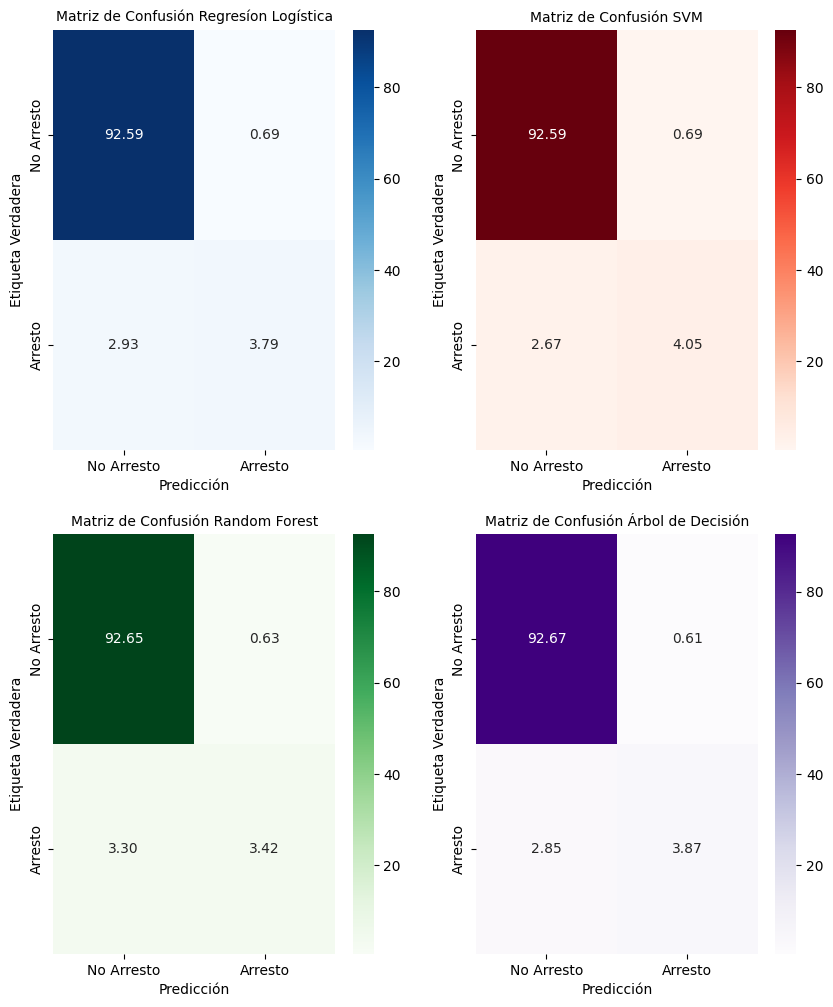

In [51]:
pd.set_option('display.max_rows', None)

print('\n' + 'MSE ÁRBOL DE DECISIÓN '.ljust(30,'.') + f' {mse_modelo_clasificador_arbol_decision_2:.4f}'.rjust(10, '.'))

print('=' * 60 + '\n')
print('MATRIZ DE CONFUSIÓN ARBOL DE DECISION\n')
print(matriz_confusion)
print('\n' + '=' * 60)


print('INFORME DE CLASIFICACIÓN ARBOL DE DECISIÓN\n')
print(informe_clasificacion)
print('_' * 60 + '\n')


print('\n' + 'MSE RANDOM FOREST '.ljust(30,'.') + f' {mse_modelo_clasificador_random_forest_rfs:.4f}'.rjust(10, '.'))

print('=' * 60 + '\n')
print('MATRIZ DE CONFUSIÓN RANDOM FOREST\n')
print(matriz_confusion_rfs)
print('\n' + '=' * 60)

print('INFORME DE CLASIFICACIÓN RANDOM FOREST\n')
print(informe_clasificacion_rfs)
print('_' * 60 + '\n')


print('\n' + 'MSE SVM '.ljust(30,'.') + f' {mse_modelo_clasificador_svm_s:.4f}'.rjust(10, '.'))

print('\n' + '=' * 60 + '\n')
print('MATRIZ DE CONFUSIÓN SVM\n')
print(matriz_confusion_svm_s)
print('\n' + '=' * 60)

print('INFORME DE CLASIFICACIÓN SVM\n')
print(informe_clasificacion_svm_s)
print('_' * 60 + '\n')

print('\n' + 'MSE REGRESION LOGÍSTICA '.ljust(30,'.') + f' {mse_modelo_clasificador_lr:.4f}'.rjust(10, '.'))

print('\n' + '=' * 60 + '\n')
print('MATRIZ DE CONFUSIÓN REGRESION LOGISTICA\n')
print(matriz_confusion_lr)
print('\n' + '=' * 60)

print('INFORME DE CLASIFICACIÓN REGRESION LOGISTICA\n')
print(informe_clasificacion_lr)
print('\n' + '=' * 60)

pd.reset_option('display.max_rows')

fig, axes = plt.subplots(2, 2, figsize=(10, 12))

sns.heatmap(ax=axes[0, 0], data=matriz_confusion_porcentajes_lr, annot=True, fmt='.2f', cmap='Blues', cbar=True)

axes[0, 0].set_title('Matriz de Confusión Regresíon Logística', fontsize=10)
axes[0, 0].set_xlabel('Predicción')
axes[0, 0].set_ylabel('Etiqueta Verdadera')
axes[0, 0].set_xticks([0.5 , 1.5])
axes[0, 0].set_yticks([0.5 , 1.5])
axes[0, 0].set_xticklabels(['No Arresto', 'Arresto'])
axes[0, 0].set_yticklabels(['No Arresto', 'Arresto'])

sns.heatmap(ax=axes[0, 1], data=matriz_confusion_porcentajes_svm_s, annot=True, fmt='.2f', cmap='Reds', cbar=True)

axes[0, 1].set_title('Matriz de Confusión SVM', fontsize=10)
axes[0, 1].set_xlabel('Predicción')
axes[0, 1].set_ylabel('Etiqueta Verdadera')
axes[0, 1].set_xticks([0.5 , 1.5])
axes[0, 1].set_yticks([0.5 , 1.5])
axes[0, 1].set_xticklabels(['No Arresto', 'Arresto'])
axes[0, 1].set_yticklabels(['No Arresto', 'Arresto'])

sns.heatmap(ax=axes[1, 0], data=matriz_confusion_porcentajes_rfs, annot=True, fmt='.2f', cmap='Greens', cbar=True)

axes[1, 0].set_title('Matriz de Confusión Random Forest', fontsize=10)
axes[1, 0].set_xlabel('Predicción')
axes[1, 0].set_ylabel('Etiqueta Verdadera')
axes[1, 0].set_xticks([0.5 , 1.5])
axes[1, 0].set_yticks([0.5 , 1.5])
axes[1, 0].set_xticklabels(['No Arresto', 'Arresto'])
axes[1, 0].set_yticklabels(['No Arresto', 'Arresto'])

sns.heatmap(ax=axes[1, 1], data=matriz_confusion_porcentajes, annot=True, fmt='.2f', cmap='Purples', cbar=True)

axes[1, 1].set_title('Matriz de Confusión Árbol de Decisión', fontsize=10)
axes[1, 1].set_xlabel('Predicción')
axes[1, 1].set_ylabel('Etiqueta Verdadera')
axes[1, 1].set_xticks([0.5 , 1.5])
axes[1, 1].set_yticks([0.5 , 1.5])
axes[1, 1].set_xticklabels(['No Arresto', 'Arresto'])
axes[1, 1].set_yticklabels(['No Arresto', 'Arresto'])

plt.show()

Dentro de los 4 estimadores creados, el de mejor rendimiento bajo distintos parámetros es Super Vector Machine.  Destaca con un MSE de 0.0336, el más bajo de los modelos probados.  También destaca su rendimiento al examinar los estimadores en matriz de confusión donde podemos tener información de otras métricas para clasificadores como accuracy, precision, recall y f1_score.  Acá también posee los mejores números por lo que en cuanto a las métricas elegidas se sugiere el uso de SVM como modelo de clasificación.

Bonus (20 pts)
¿Qué puede hacer para mejorar la predicción de los modelos?

Algunos puntos que creo mejorarían en el rendimiento del modelo son por ejemplo una mirada distinta en la política de datos de entrenamiento y testeo cambiando respecto al criterio de ratio como también la aleatoridad sobre la elección de los datos.  El análisis exploratorio debe ser más acusioso y obtener algunas métricas que podrían resultar útiles en el filtrado de las variables.  Pienso que estas dos miradas respecto al uso de los datos en la construcción de un modelo más eficiente serían muy útiles para mejorar las métricas y obtener un producto mucho más fiable.